In [1]:
# Graph Structure

-------------------------------------------------

The raw code for this Jupyter notebook is by default hidden for easier reading. The main focus of this particular page of the notebook is on the graphs and their interpretation. To toggle on/off the raw code, click below:

SyntaxError: invalid syntax (<ipython-input-1-d6a4a9b9abd4>, line 3)

In [2]:
# Setup Code toggle button
from IPython.core.display import HTML  

HTML(''' 
<center><h3>
<a href="javascript:code_toggle()">Talk is cheap, show me the code.</a>
</center></h3>
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
''')

In [3]:
# 22.01.2017
# Disable warnings because of nx.draw() output:
#     warnings.warn("axes.hold is deprecated, will be removed in 3.0")
import warnings
warnings.filterwarnings('ignore')

# Setup notebook theme
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme(get_themes()[1])

IndexError: list index out of range

## Web Structure Metrics

---------------------------------------------

Graph theoretic methods have been useful for searching, browsing and information gathering, and web mining. Using the terms from graph theory pages are referred to as _nodes_ and links _arcs_. In graph theory some important terminology consists of:

  * Directed Graph

    * Set of nodes such that each arc is an ordered pair $(u,v)$ representing a connection $u\to v$.
    * Out-Degree: number of arcs from $u$
    * In-Degree: number of arcs to $u$
    * If $\nexists \: u \to v$ then the degree is said to be $\infty$
    * Strongly Connected Component (SCC): Set of nodes such that $\forall \: u,\,v \: \exists \: u \to v$
    * There can be one or many SCCs

  * Undirected Graph

    * Set of nodes such that each arc is an unordered pair ${u,v}$
    * Disregards link direction
    * Degree is equal to the number of edges
    * Component: Set of nodes such that $\exists \: u \to v$

  * Breadth-First Search (BFS)
  
    * Searches from starting node $u$ each layer of links
    * Each layer $k$ consists of the nodes $k$ links from $u$, but not in an earlier layer
    * Optimal, will always find the shortest path and it is the index of the layer
    * If a node is not found in the search the distance is $\infty$
  
  * Diameter
  
    * Number of ordered pairs $(u,v)$ of the shortest path from $u$ to $v$.
    * The _average distance_ definition presents the problem of $\infty$
    * The _average distance_ or _diameter_ is instead calculated from $P$
    
$$
    \text{let } P \text{ be the set of all ordered pairs } (u,v) \: \Big| \: u \to v
$$

#### Macroscopic structure

About 90% of the nodes comprise a single highly connected component, and each of the four sets are approximately the same size.

  1. (SCC) Strongly Connected Component: Pages reach each other by direct links.
  2. IN: Pages that link into the SCC, but are not linked back to from the SCC.
  3. OUT: Pages that are linked to by the SCC, but do not link back.
  4. TENDRILS: Pages that can not reach the SCC, and cannot be reached from the SCC.

The power law:

$$
\frac{1}{i^x} \quad \Big| \quad x > 1
$$

The power law has also been observed to characterize user behavior in the web in accesses to web pages, numbers of times users access particular pages at a single site, and the in and out degrees of vertices on the web graph.

## A Sample Graph

-------------------------------------------

The sample graph below is the dataset that will be used to demonstrate these principles. The heatmaping is based on the number of connections or _degree_.

In [3]:
import networkx as nx

# Build the graph
G = nx.Graph()
G.add_nodes_from('ABCDEFGHIKLMNOP')
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'A'), \
                  ('C', 'G'), ('E', 'F'), ('G', 'C'), ('G', 'H'), \
                  ('I', 'H'), ('I', 'K'), ('L', 'D'), ('M', 'A'), \
                  ('M', 'N'), ('N', 'D'), ('O', 'A'), ('P', 'G')])


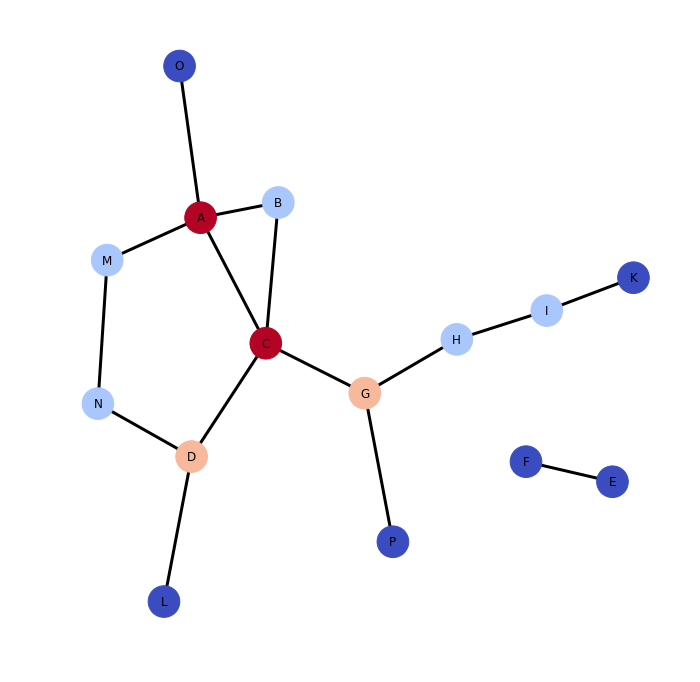

In [4]:
import pylab as plt

# with nodes colored by degree
node_color=[float(G.degree(v)) for v in G]
cmap = plt.cm.YlGnBu

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="neato")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True, cmap=plt.cm.coolwarm)

plt.show()

Some properties:

In [5]:
print("Number of nodes: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of nodes: 15
Number of edges: 15


The same data as a directed graph, here the heatmapping is based again on the _degree_ of the node. From this graph it starts to become clearer what nodes form the various parts of the graph, SCC, IN, OUT, and TENDRILS.

In [6]:
H = nx.DiGraph()
H.add_nodes_from('ABCDEFGHIKLMNOP')
H.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'A'), \
                  ('C', 'G'), ('E', 'F'), ('G', 'C'), ('G', 'H'), \
                  ('I', 'H'), ('I', 'K'), ('L', 'D'), ('M', 'A'), \
                  ('M', 'N'), ('N', 'D'), ('O', 'A'), ('P', 'G')])


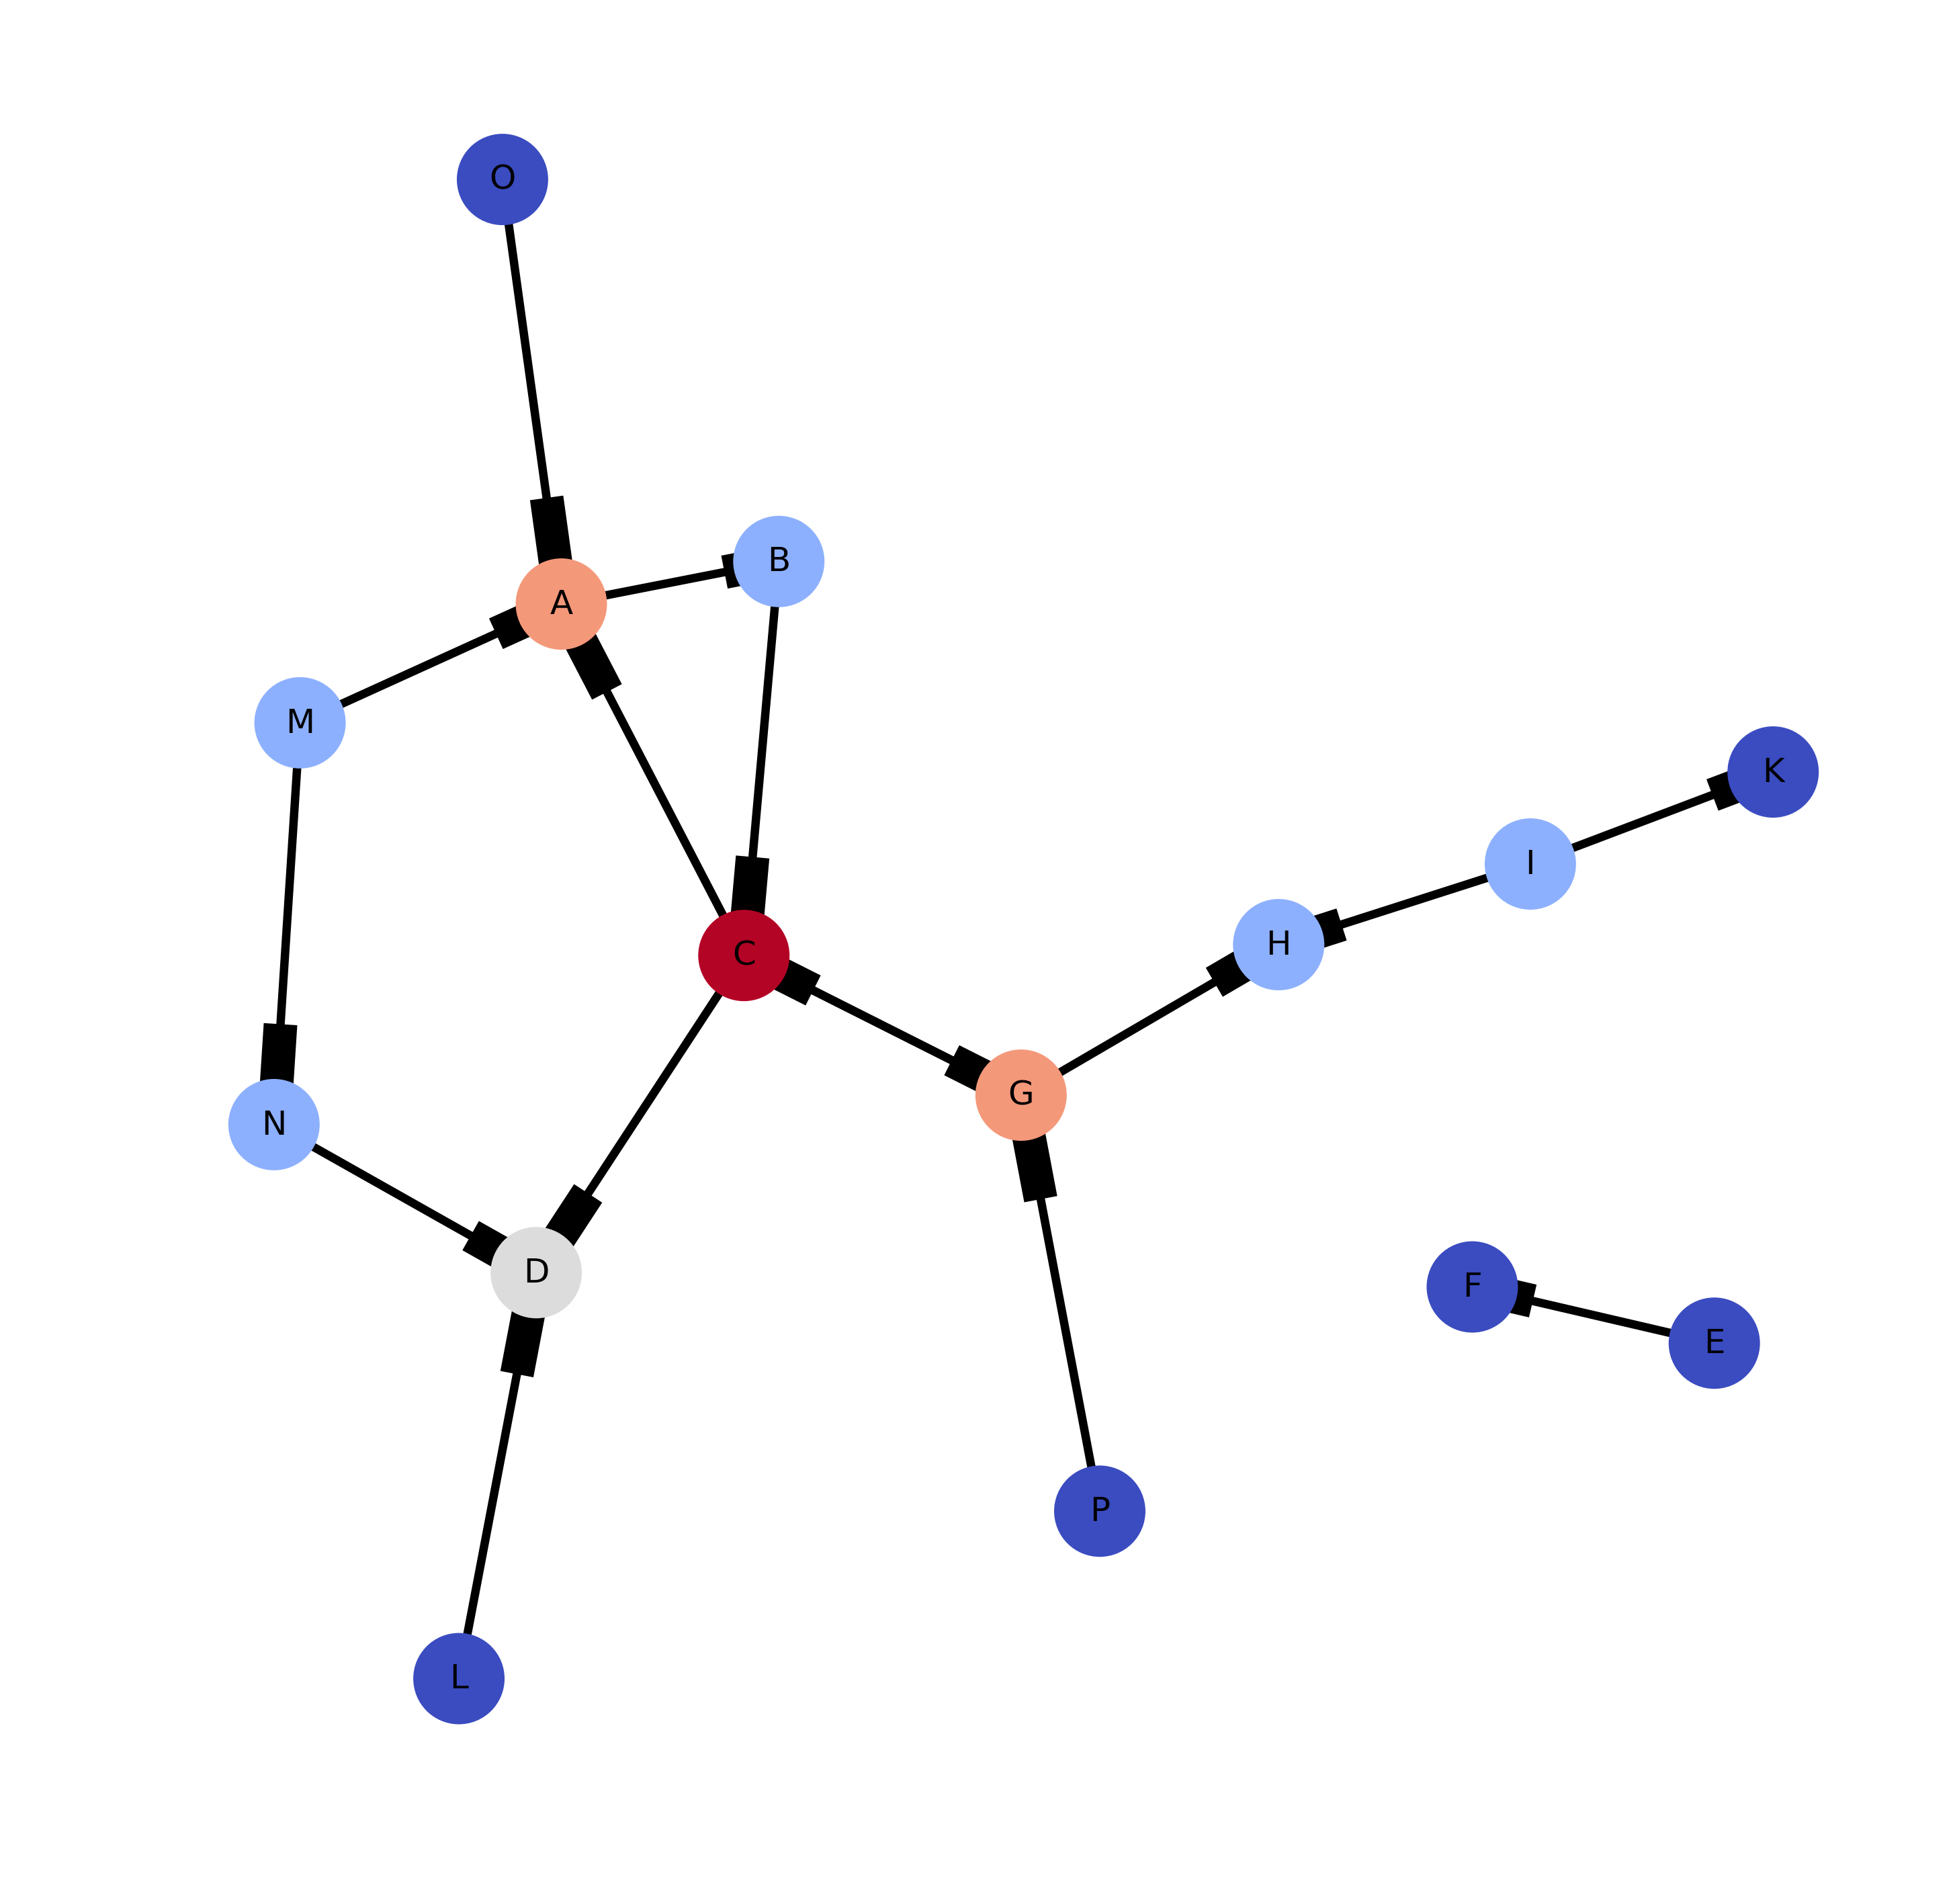

In [22]:
import matplotlib.pyplot as plt
import pylab as plt

from networkx.drawing.nx_agraph import graphviz_layout

# with nodes colored by degree
node_color=[float(H.degree(v)) for v in H]

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(H,prog="neato")
nx.draw(H, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True, cmap=plt.cm.coolwarm)

plt.show()

Directed graph properties:

In [8]:
print("Number of nodes: {}".format(H.number_of_nodes()))
print("Number of edges: {}".format(H.number_of_edges()))
print("Strongly connected: {}".format(nx.is_strongly_connected(H)))
print("Number of strongly connected components: {}".format(nx.number_strongly_connected_components(H)))

Number of nodes: 15
Number of edges: 16
Strongly connected: False
Number of strongly connected components: 12


#### The SCC

Below we have the graph containing the SCC components, which consists of the nodes which are reachable from eachother. In this sample graph these nodes are `A`, `B`, `C`, and `G`.

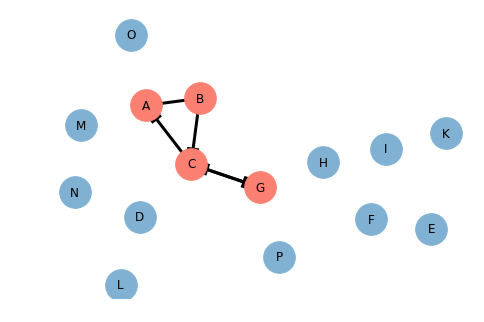

In [9]:
# Build the SCC graph
for h in nx.strongly_connected_component_subgraphs(H):
    if 'A' in h:
        nx.draw(h, pos, node_color='#fb8072', node_size=1000, edge_color='k', \
                width=3, with_labels=True)
    else:
        nx.draw(h, pos, node_color='#80b1d3', node_size=1000, edge_color='k', \
        width=3, with_labels=True)

plt.show()

Going back to the directed graph:

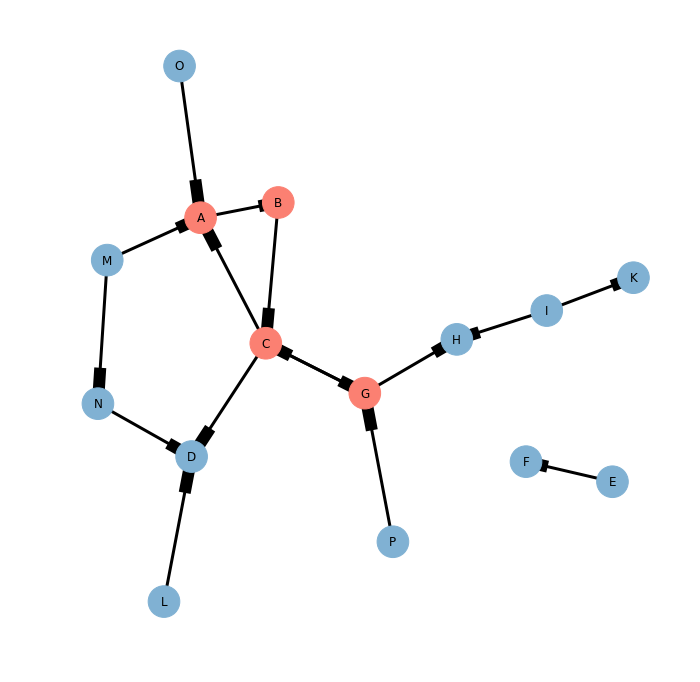

In [10]:
SCC = ['A', 'B', 'C', 'G']
node_color = []
for node in H.nodes():
    if node in SCC:
        node_color.append('#fb8072')
    else:
        node_color.append('#80b1d3')

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(H,prog="neato")
nx.draw(H, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True)

plt.show()

#### IN and OUT

Visually identifying all of the IN nodes is now easy, they are the nodes link into the SCC, but are not linked back to from the SCC. The list of IN is `O`, `M`, `P` which we will color green.

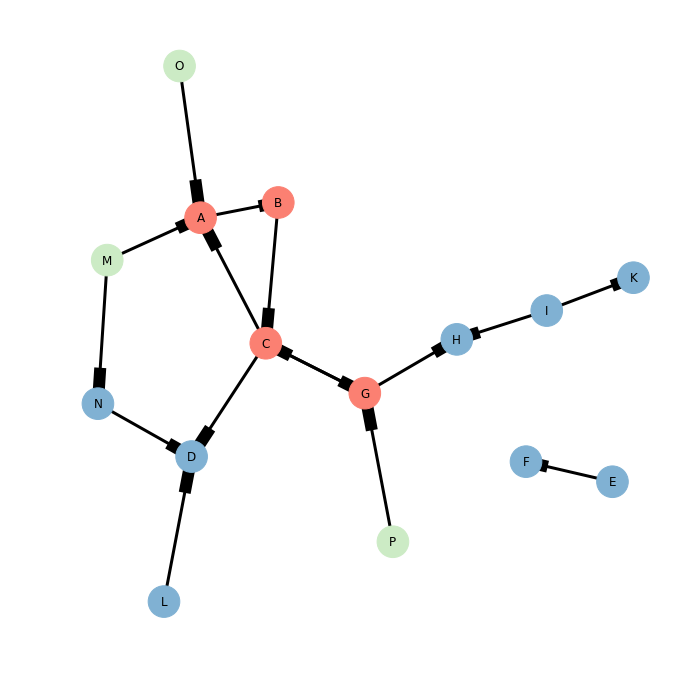

In [11]:
SCC = ['A', 'B', 'C', 'G']
IN = ['O', 'M', 'P']

node_color = []
for node in H.nodes():
    if node in SCC:
        node_color.append('#fb8072')
    elif node in IN:
        node_color.append('#ccebc5')
    else:
        node_color.append('#80b1d3')

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(H,prog="neato")
nx.draw(H, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True)

plt.show()

There appears to be only two OUT nodes which are nodes that are linked to by the SCC, but do not link back. OUT nodes are `H` and `D` which are colored yellow.

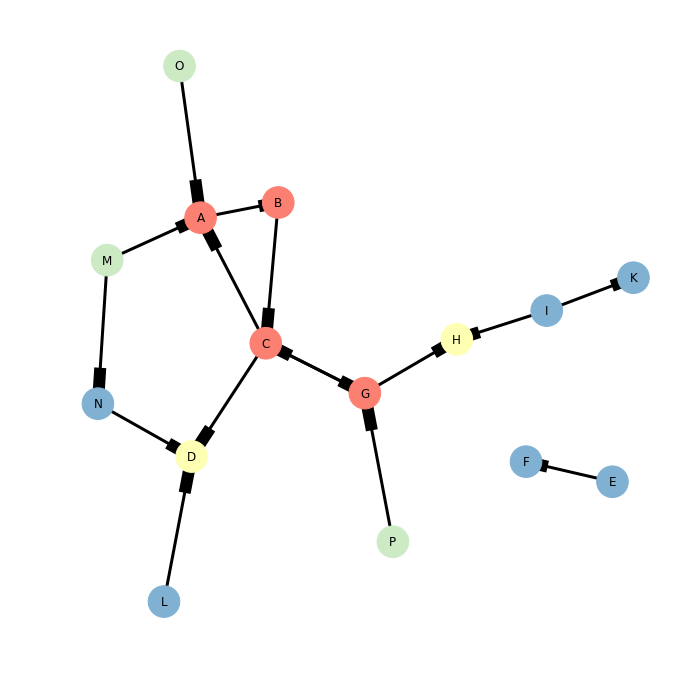

In [12]:
SCC = ['A', 'B', 'C', 'G']
IN = ['O', 'M', 'P']
OUT = ['H', 'D']

node_color = []
for node in H.nodes():
    if node in SCC:
        node_color.append('#fb8072')
    elif node in IN:
        node_color.append('#ccebc5')
    elif node in OUT:
        node_color.append('#ffffb3')
    else:
        node_color.append('#80b1d3')

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(H,prog="neato")
nx.draw(H, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True)

plt.show()

#### DISCONNECTED 

The DISCONNECTED component consists of `E` and `F` colored grey below.

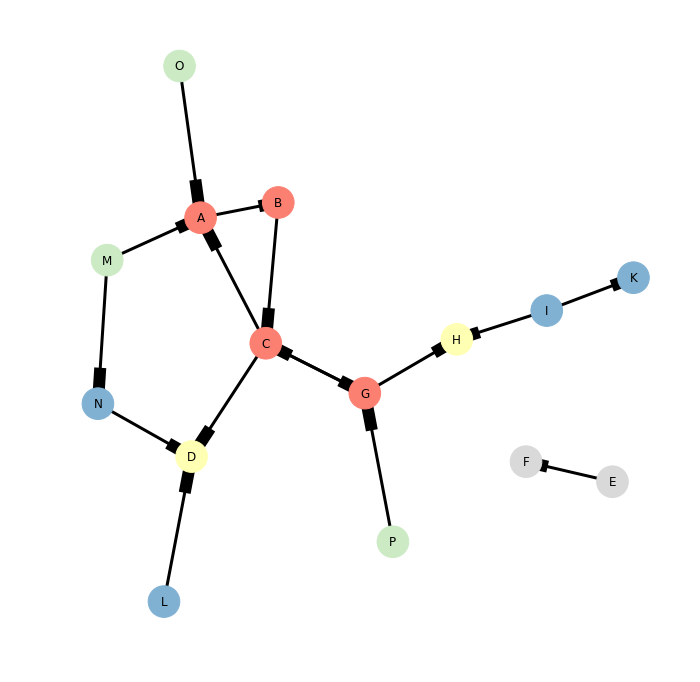

In [13]:
SCC = ['A', 'B', 'C', 'G']
IN = ['O', 'M', 'P']
OUT = ['H', 'D']
DISCONNECTED = ['E', 'F']

node_color = []
for node in H.nodes():
    if node in SCC:
        node_color.append('#fb8072')
    elif node in IN:
        node_color.append('#ccebc5')
    elif node in OUT:
        node_color.append('#ffffb3')
    elif node in DISCONNECTED:
        node_color.append('#d9d9d9')
    else:
        node_color.append('#80b1d3')

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(H,prog="neato")
nx.draw(H, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True)

plt.show()

#### TUBES and TENDRILS

The TUBES are the portions that create a path from IN to OUT or vice versa, only one node meets this desciption in the example graph `N` which is colored purple below. The TENDRILS, everything that is left in blue, are the portions that link into or out of IN and OUT without any direct links with the SCC, these nodes are `L`, `I`, and `K`.

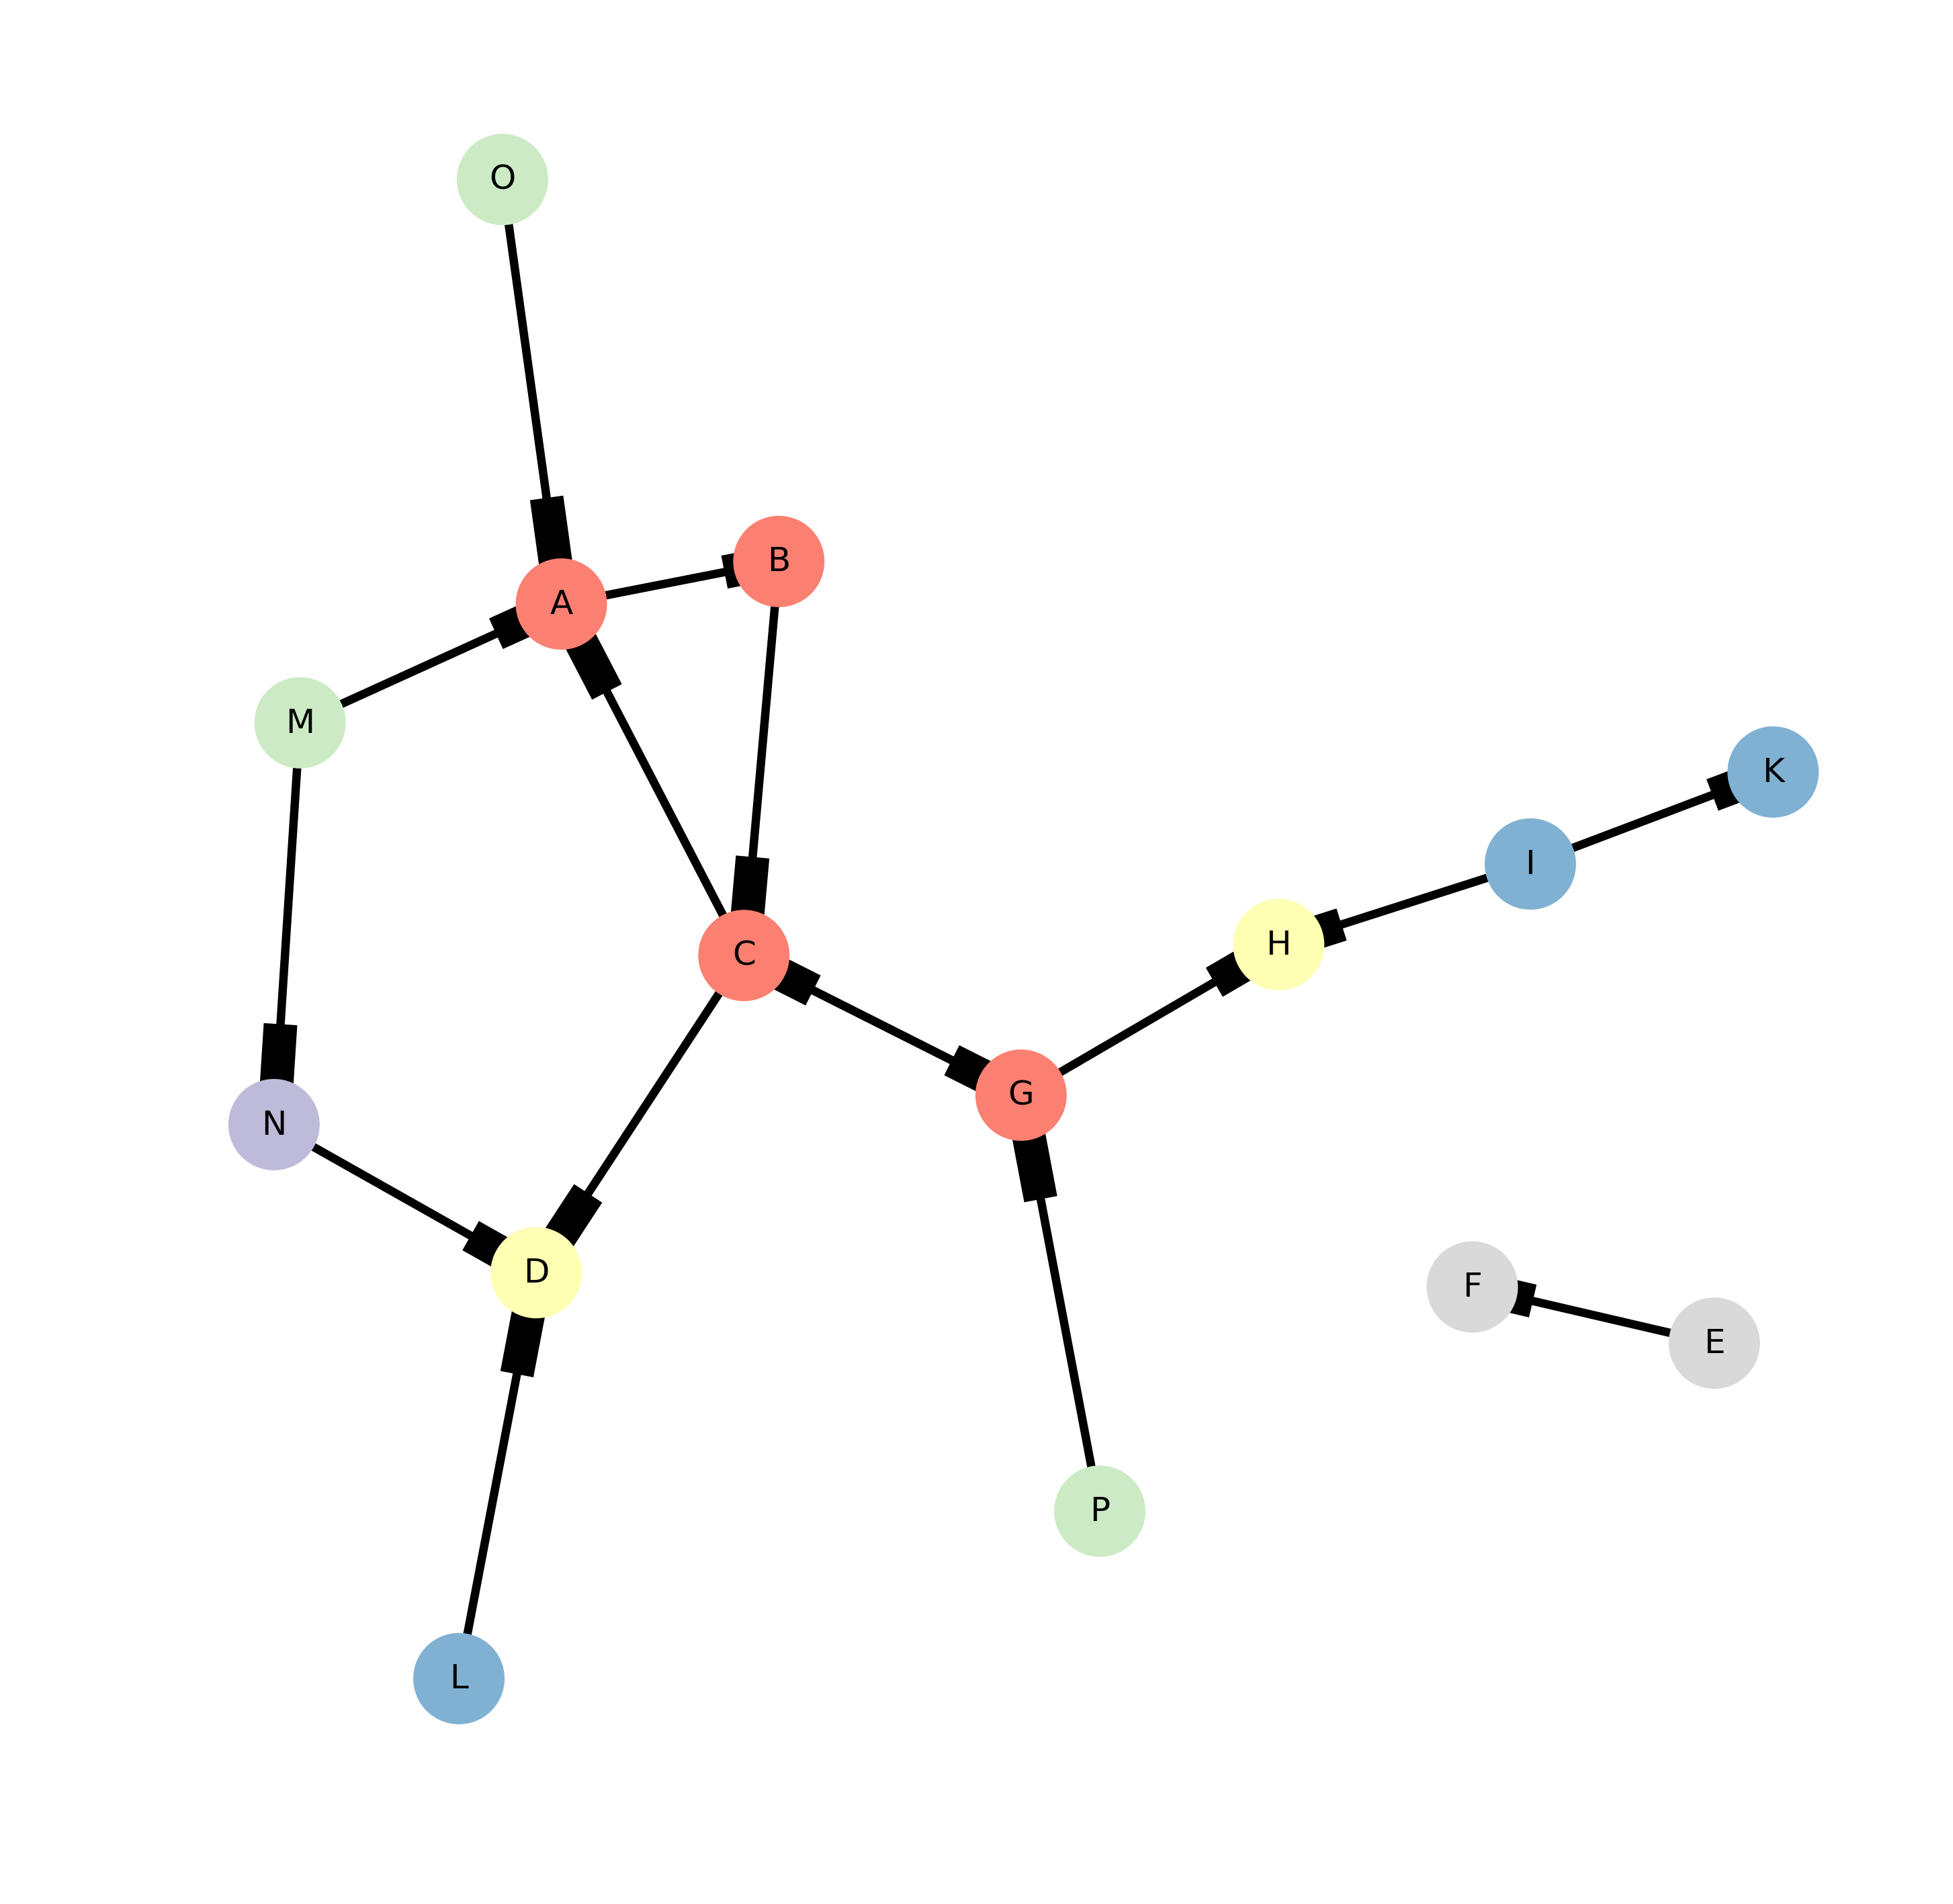

In [21]:
SCC = ['A', 'B', 'C', 'G']
IN = ['O', 'M', 'P']
OUT = ['H', 'D']
DISCONNECTED = ['E', 'F']
TUBES = ['N']

node_color = []
for node in H.nodes():
    if node in SCC:
        node_color.append('#fb8072')
    elif node in IN:
        node_color.append('#ccebc5')
    elif node in OUT:
        node_color.append('#ffffb3')
    elif node in DISCONNECTED:
        node_color.append('#d9d9d9')
    elif node in TUBES:
        node_color.append('#bebada')
    else:
        node_color.append('#80b1d3')

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(H,prog="neato")
nx.draw(H, pos, node_color=node_color, node_size=1000, edge_color='k', \
        width=3, with_labels=True)

plt.show()